## This Jupyter Notebook will be used to perform the Coursera Capstone Project

In [2]:
# %config IPCompleter.greedy=True
import pandas as pd
import numpy as np


print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('D:/personale/MACHINELEARNING/IBM/capstone/Data-Collisions.csv')
df.info()
# df['SEVERITYCODE'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

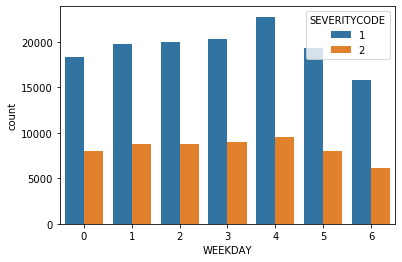

In [12]:
# df = pd.read_csv('D:/personale/MACHINELEARNING/IBM/capstone/Data-Collisions.csv')

# df = pd.get_dummies(data = df, columns = ['JUNCTIONTYPE'], prefix = 'JT')
# df.head(2)
# df['SEVERITYCODE.1'].value_counts()
# df['LOCATION'].value_counts()
# df.groupby('ADDRTYPE')['SEVERITYCODE'].value_counts(normalize= True)


df['WEEKDAY'] = pd.to_datetime(df['INCDATE']).dt.weekday
df.groupby('WEEKDAY')['SEVERITYCODE'].value_counts(normalize= True)

# df['SDOT_COLCODE'].value_counts()
# df.groupby('MONTHDAY')['SEVERITYCODE'].value_counts(normalize = True)
sns.countplot(data = df, x = 'WEEKDAY', hue = 'SEVERITYCODE')

In [6]:
df1 = df.copy(deep = True)
df1.drop(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 
'STATUS', 'INCDATE', 'INCDTTM', 'SDOT_COLDESC', 'SDOTCOLNUM', 'ST_COLDESC','SEGLANEKEY', 'CROSSWALKKEY', 'SEVERITYCODE.1', 'SEVERITYDESC', 'LOCATION','INTKEY', 
'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'PEDROWNOTGRNT', 'SPEEDING', 'INATTENTIONIND'], axis = 1, inplace = True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 16 columns):
SEVERITYCODE     194673 non-null int64
ADDRTYPE         192747 non-null object
COLLISIONTYPE    189769 non-null object
PERSONCOUNT      194673 non-null int64
PEDCOUNT         194673 non-null int64
PEDCYLCOUNT      194673 non-null int64
VEHCOUNT         194673 non-null int64
JUNCTIONTYPE     188344 non-null object
SDOT_COLCODE     194673 non-null int64
UNDERINFL        189789 non-null object
WEATHER          189592 non-null object
ROADCOND         189661 non-null object
LIGHTCOND        189503 non-null object
ST_COLCODE       194655 non-null object
HITPARKEDCAR     194673 non-null object
MONTHDAY         194673 non-null int64
dtypes: int64(7), object(9)
memory usage: 17.1+ MB


In [70]:
# df1['WEATHER'].value_counts(normalize = True)
# df1['ADDRTYPE'] = df1['ADDRTYPE'].fillna('Unknown')
df1['HITPARKEDCAR'].unique()

array(['N', 'Y'], dtype=object)

In [52]:
# df1.isnull()
df1_nan = df1.isnull()
rows_nan = df1_nan.any(axis=1)
rows_nan = df1[rows_nan]
# rows_nan.head(10)

In [110]:
df2 = df[['SDOT_COLDESC', 'ST_COLDESC', 'COLLISIONTYPE', 'HITPARKEDCAR']].copy(deep= True)
r, _ = np.where(df2.isna())
r = np.unique(r).tolist()

# rows_nan = df2_nan.any(axis=1)
# rows_nan = df2[rows_nan]
# rows_nan.head(10)
# df.index[df['BoolCol']].tolist()

# ix = df2.index[df2_nan == True].tolist()

# df2.isnull()
# df2_nan = df2.isnull()
# rows_nan = df2_nan.any(axis=1)
# rows_nan = df2[rows_nan]
# rows_nan
# rows_nan.head(2)

In [111]:
# df['SDOT_COLDESC'].unique()
# df.groupby('SDOT_COLDESC')['SEVERITYCODE'].value_counts(normalize = True )
# df2[df2['SDOT_COLDESC']=='MOTOR VEHICLE STRUCK OBJECT IN ROAD']
df2 = df[['SDOT_COLDESC', 'ST_COLDESC', 'COLLISIONTYPE', 'HITPARKEDCAR']].copy(deep= True)

mask_other = (df2['COLLISIONTYPE'].isnull()) & (df2['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK OBJECT IN ROAD')

mask_angles = (df2['COLLISIONTYPE'].isnull()) & (df2['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE')

mask_parked = (df2['COLLISIONTYPE'].isnull()) & (df2['SDOT_COLDESC'] == 'DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END') & (df2['ST_COLDESC'] == 'One parked--one moving')


df2['COLLISIONTYPE'][mask_other] = 'Other'
df2['COLLISIONTYPE'][mask_angles] = 'Angles'
df2['COLLISIONTYPE'][mask_parked] = 'Parked Car'
df2.iloc[r,:]
# df2['COLLISIONTYPE_1'] = df2['COLLISIONTYPE'].apply(lambda x: 'Other' \
#     if (x.isnull()) & \
#   (df2['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK OBJECT IN ROAD'))

,SDOT_COLDESC,ST_COLDESC,COLLISIONTYPE,HITPARKEDCAR
15,MOTOR VEHICLE STRUCK OBJECT IN ROAD,NaN,Parked Car,N
36,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,Parked Car,N
53,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,Parked Car,N
60,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,Parked Car,N
75,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,Parked Car,N
...,...,...,...,...
194620,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,Parked Car,N
194625,MOTOR VEHICLE STRUCK OBJECT IN ROAD,NaN,Parked Car,N
194646,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,Parked Car,N
194654,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,Parked Car,N


In [78]:
df2['SDOT_COLDESC'].unique()
# df2['COLLISIONTYPE'].unique()

array(['MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END',
       'PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE',
       'MOTOR VEHICLE STRUCK OBJECT IN ROAD',
       'MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT',
       'MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE',
       'DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END',
       'NOT ENOUGH INFORMATION / NOT APPLICABLE',
       'MOTOR VEHCILE STRUCK PEDESTRIAN',
       'PEDALCYCLIST OVERTURNED IN ROAD',
       'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE',
       'MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END',
       'MOTOR VEHICLE STRUCK PEDALCYCLIST, LEFT SIDE SIDESWIPE',
       'MOTOR VEHICLE OVERTURNED IN ROAD',
       'MOTOR VEHICLE RAN OFF ROAD - NO COLLISION',
       'DRIVERLESS VEHICLE RAN OFF ROAD - HIT F

In [104]:
a = np.array(df2['SDOT_COLDESC'].str.find('REAR END').tolist())
b, = np.where(a!= -1)
b = b.tolist()
len(b)

54719

In [88]:
df2[df2['SDOT_COLDESC'] == 'DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END']

,SDOT_COLDESC,ST_COLDESC,COLLISIONTYPE,HITPARKEDCAR,SEVERITYCODE,VEHCOUNT
32,DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END,One parked--one moving,Parked Car,N,1,2
3397,DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END,One parked--one moving,Parked Car,N,1,3
6041,DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END,One parked--one moving,Parked Car,N,1,2
9299,DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END,One parked--one moving,Parked Car,N,1,2
9471,DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END,From same direction - both going straight - on...,Rear Ended,N,1,3
...,...,...,...,...,...,...
170198,DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END,One parked--one moving,Parked Car,Y,1,2
170845,DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END,One parked--one moving,Parked Car,N,1,4
179888,DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END,Entering at angle,Angles,N,1,2
182586,DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END,One parked--one moving,Parked Car,Y,1,3


In [81]:
df['ST_COLDESC'].unique()

array(['Entering at angle',
       'From same direction - both going straight - both moving - sideswipe',
       'One parked--one moving', 'From same direction - all others',
       'Vehicle Strikes Pedalcyclist', 'One car leaving driveway access',
       'From same direction - both going straight - one stopped - rear-end',
       'From opposite direction - all others', nan,
       'From opposite direction - one left turn - one straight',
       'Other object',
       'From same direction - both going straight - both moving - rear-end',
       'Fixed object',
       'From same direction - both going straight - one stopped - sideswipe',
       'Vehicle - Pedalcyclist', 'Vehicle going straight hits pedestrian',
       'One car leaving parked position',
       'One car entering driveway access',
       'Vehicle turning right hits pedestrian', 'Vehicle overturned',
       'From same direction - one right turn - one straight',
       'From same direction - one left turn - one straight',
   

In [106]:
df.groupby('VEHCOUNT')['SEVERITYCODE'].value_counts(normalize = True)

VEHCOUNT  SEVERITYCODE
0         1               0.758702
          2               0.241298
1         2               0.547810
          1               0.452190
2         1               0.756526
          2               0.243474
3         1               0.579554
          2               0.420446
4         1               0.555647
          2               0.444353
5         1               0.506616
          2               0.493384
6         1               0.589041
          2               0.410959
7         1               0.521739
          2               0.478261
8         1               0.666667
          2               0.333333
9         2               0.666667
          1               0.333333
10        2               1.000000
11        1               0.500000
          2               0.500000
12        1               1.000000
Name: SEVERITYCODE, dtype: float64